# Interpolate between points

In [1]:
from io import StringIO
import requests
import json
import pandas as pd

import numpy as np
from scipy.interpolate import griddata
from itertools import izip
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline

## Load data from object store

In DSx click **Insert from Code** from the menu on the right, and then **Insert Pandas DataFrame**.

In [ ]:
# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_xxx(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'xxx','domain': {'id': 'xxx'},
            'password': 'xxx'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

points = pd.read_csv(get_object_storage_file_with_credentials_0177c67aceeb4046a3c5c7261877addb('Weather', 'uk_weather_11april.csv'))
points.head()

## Load local data

In [5]:
points = pd.read_csv("assets/uk_weather_11april.csv", low_memory=False)

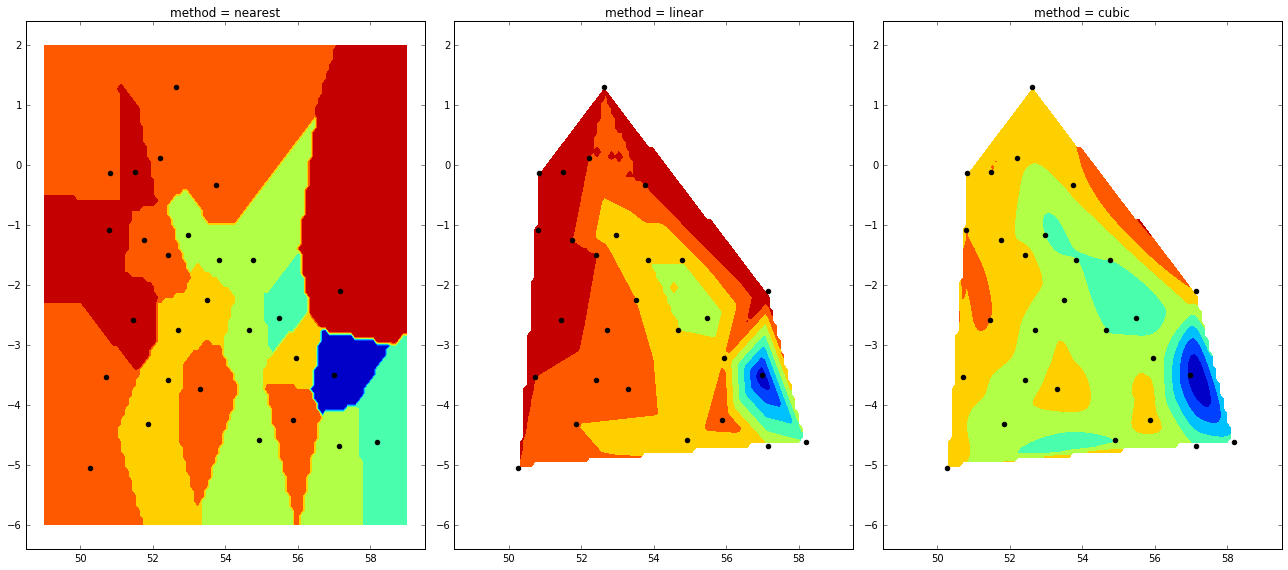

In [6]:
from scipy.interpolate import griddata

# grid of latitude and longitude values
x = np.linspace(49.0,59.0,100)
y =  np.linspace(-6,2,100)
X, Y = np.meshgrid(x,y)

# observations
px = points['lat'].as_matrix()
py = points['lon'].as_matrix()
pz = points['temp'].as_matrix()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), pz, (X, Y), method=method)
    ax[i].contourf(X, Y, Ti)
    ax[i].set_title('method = {}'.format(method))
    ax[i].scatter(px, py, c='k', marker='o')

plt.tight_layout()